<a href="https://colab.research.google.com/github/Aaina26/Deep-Learning-Unschool/blob/main/Project_2_CNN_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
#load data
cifar10=tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test)=cifar10.load_data()
x_train, x_test= x_train/255.0, x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)

170498071/170498071 [==============================] - 33s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
#determine number of classes
k=len(set(y_train))
print("number of classes:",k)

number of classes: 10


In [5]:
#Build the model
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3, 3), strides=2, activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Conv2D(256,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(2028, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [6]:
#compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5810 - accuracy: 0.4174 - val_loss: 1.2977 - val_accuracy: 0.5301
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2500 - accuracy: 0.5517 - val_loss: 1.1562 - val_accuracy: 0.5828
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1097 - accuracy: 0.6056 - val_loss: 1.0827 - val_accuracy: 0.6199
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0122 - accuracy: 0.6422 - val_loss: 1.0068 - val_accuracy: 0.6501
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9324 - accuracy: 0.6710 - val_loss: 0.9622 - val_accuracy: 0.6599
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8634 - accuracy: 0.6955 - val_loss: 0.9574 - val_accuracy: 0.6665
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8108 - accuracy: 0.7143 - val_loss: 0.9464 - val_accuracy

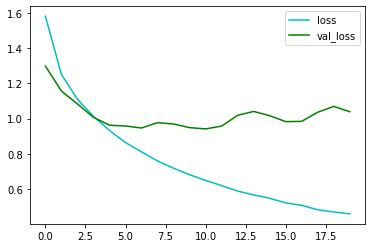

In [7]:
#plot loss 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss',color='c')
plt.plot(r.history['val_loss'],label='val_loss',color='g')
plt.legend()

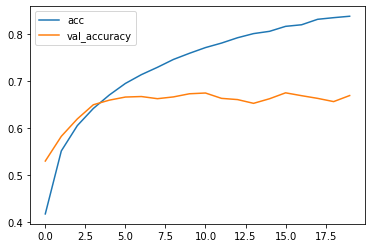

In [8]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
print(cm)

313/313 [==============================] - 1s 2ms/step
[[663  19  75  26  39  11   4  16  79  68]
 [ 16 737  10  15   6   7   5  10  29 165]
 [ 43   4 554  85 102  89  61  36  15  11]
 [ 16   4  80 549  59 183  43  32  13  21]
 [ 12   3  73 101 618  52  38  89   9   5]
 [  3   3  60 233  37 586  10  45  11  12]
 [  7   9  47 134  57  47 663  11  10  15]
 [  9   1  44  48  56  89   6 725   1  21]
 [ 72  29  21  22  10   7   4   9 797  29]
 [ 25  56   8  25   8  11   4  26  32 805]]


In [11]:
df=pd.DataFrame(y_test, columns=['y_Actual'])
df1=pd.DataFrame(p_test,columns=['y_Predicted'])
df['y_Predicted']=df1['y_Predicted']
df.head

<bound method NDFrame.head of       y_Actual  y_Predicted
0            3            3
1            8            8
2            8            8
3            0            0
4            6            6
...        ...          ...
9995         8            8
9996         3            5
9997         5            5
9998         1            1
9999         7            7

[10000 rows x 2 columns]>

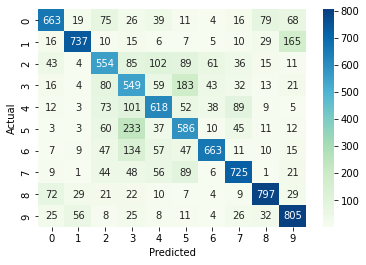

In [13]:
#plot confusion matrix
import seaborn as sn
confusion_matrix=pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True, fmt='d',cmap='GnBu')

In [14]:
#label mapping
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

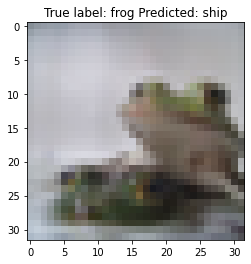

In [16]:
#show some misclassified examples
#TODO: add label names
misclassified_idx=np.where(p_test != y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s'%(labels[y_test[i]],labels[p_test[i]]));
